In [5]:
# Dependencies and Setup
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')



In [6]:

# Files to Load 
mt_df = pd.read_csv("data/mouse_drug_data.csv")
ct_df = pd.read_csv("data/clinicaltrial_data.csv")

In [7]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mt_df.head(100)
ct_df.head(100)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0
...,...,...,...,...
95,k862,0,45.0,0
96,g867,0,45.0,0
97,s619,0,45.0,0
98,w697,0,45.0,0


In [8]:
# Combine the data into a single dataset
df = pd.merge(ct_df, mt_df, on='Mouse ID', how='left' )
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [9]:
# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [10]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_time = df.groupby(['Drug', 'Timepoint'], as_index=False)
TV =  drug_time['Tumor Volume (mm3)'].mean()
mtv_df = pd.DataFrame(data=TV)
mtv_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [11]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_mtv = df.groupby(['Drug', 'Timepoint', ]).sem()
# Convert to DataFrame
sem_df = pd.DataFrame(sem_mtv).reset_index()
sem_df.drop(['Metastatic Sites', 'Mouse ID'], axis = 1, inplace = True)
# Preview DataFrame
sem_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [12]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mtv = mtv_df.pivot("Timepoint", "Drug", "Tumor Volume (mm3)")
# Preview that Reformatting worked
pivot_mtv.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [14]:
# Standard Error: Minor Data Munging to Re-Format the Data Frame
SE_df = sem_df.pivot("Timepoint", "Drug", "Tumor Volume (mm3)")

# Preview that Reformatting worked
SE_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


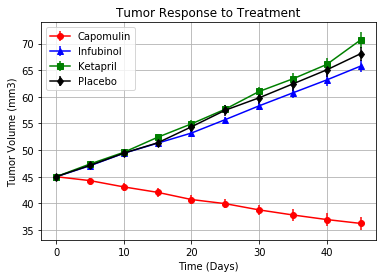

In [20]:

plt.errorbar(pivot_mtv.index.values, pivot_mtv.loc[:,"Capomulin"],
             yerr = SE_df.loc[:, "Capomulin"], marker ='o', color='red', label="Capomulin")
plt.errorbar(pivot_mtv.index.values, pivot_mtv.loc[:,"Infubinol"],
             yerr = SE_df.loc[:, "Infubinol"], marker ='^', color='blue', label="Infubinol")
plt.errorbar(pivot_mtv.index.values, pivot_mtv.loc[:,"Ketapril"],
             yerr = SE_df.loc[:, "Ketapril"], marker ='s', color='green', label="Ketapril")
plt.errorbar(pivot_mtv.index.values, pivot_mtv.loc[:,"Placebo"],
             yerr = SE_df.loc[:, "Placebo"], marker ='d', color='black', label="Placebo" )

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
lgnd = plt.legend()
# Save the Figure
plt.savefig("tumor_response.png")


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [21]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = df.groupby(["Drug", "Timepoint"], as_index=False)
site = mean_met["Metastatic Sites"].mean()
# Convert to DataFrame
mm_df = pd.DataFrame(site)
# Preview DataFrame
mm_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)